# **Tech Challenge**  👨🏻‍💻

**Problema:**

*   Você é um(a) profissional encarregado(a) de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# **Exploração de dados** 🕵🏻



*   Carregue a base de dados e explore suas características;
*   Analise estatísticas descritivas e visualize distribuições relevantes.

In [56]:
df = pd.read_csv('../data/health_cost_data.csv')
df.head()

,idade,sexo,imc,filhos,fumante,região,encargos,tipo_plano,uso_medicamento,doencas_cronicas,renda_mensal
0,99.0,feminino,32.76,4.0,não,nordeste,26863.36,básico,sim,não,4053.96
1,31.0,NaN,31.91,1.0,não,nordeste,48510.73,premium,sim,sim,8210.46
2,53.0,masculino,24.86,0.0,sim,norte,22701.25,intermediário,sim,não,7498.52
3,NaN,desconhecido,18.21,4.0,sim,norte,24116.17,intermediário,não,não,6096.40
4,NaN,NaN,18.91,1.0,não,nordeste,36751.94,básico,não,não,4485.39


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   idade             65294 non-null   float64
 1   sexo              75398 non-null   object 
 2   imc               100000 non-null  float64
 3   filhos            100000 non-null  float64
 4   fumante           100000 non-null  object 
 5   região            100000 non-null  object 
 6   encargos          100000 non-null  float64
 7   tipo_plano        100000 non-null  object 
 8   uso_medicamento   100000 non-null  object 
 9   doencas_cronicas  100000 non-null  object 
 10  renda_mensal      100000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 8.4+ MB


In [58]:
df.isnull().sum()

idade               34706
sexo                24602
imc                     0
filhos                  0
fumante                 0
região                  0
encargos                0
tipo_plano              0
uso_medicamento         0
doencas_cronicas        0
renda_mensal            0
dtype: int64

In [59]:
print(df.describe(include='all'))

               idade       sexo            imc         filhos fumante  \
count   65294.000000      75398  100000.000000  100000.000000  100000   
unique           NaN          3            NaN            NaN       2   
top              NaN  masculino            NaN            NaN     sim   
freq             NaN      26546            NaN            NaN   50254   
mean      122.184213        NaN      27.503473       2.610952     NaN   
std       214.258879        NaN       7.647369       1.779702     NaN   
min        15.000000        NaN      12.240000       0.000000     NaN   
25%        45.000000        NaN      20.830000       1.008970     NaN   
50%        92.000000        NaN      27.320000       2.795314     NaN   
75%       100.000000        NaN      34.060000       4.000000     NaN   
max      1168.000000        NaN      47.950000       7.027845     NaN   

          região       encargos tipo_plano uso_medicamento doencas_cronicas  \
count     100000  100000.000000     100000  

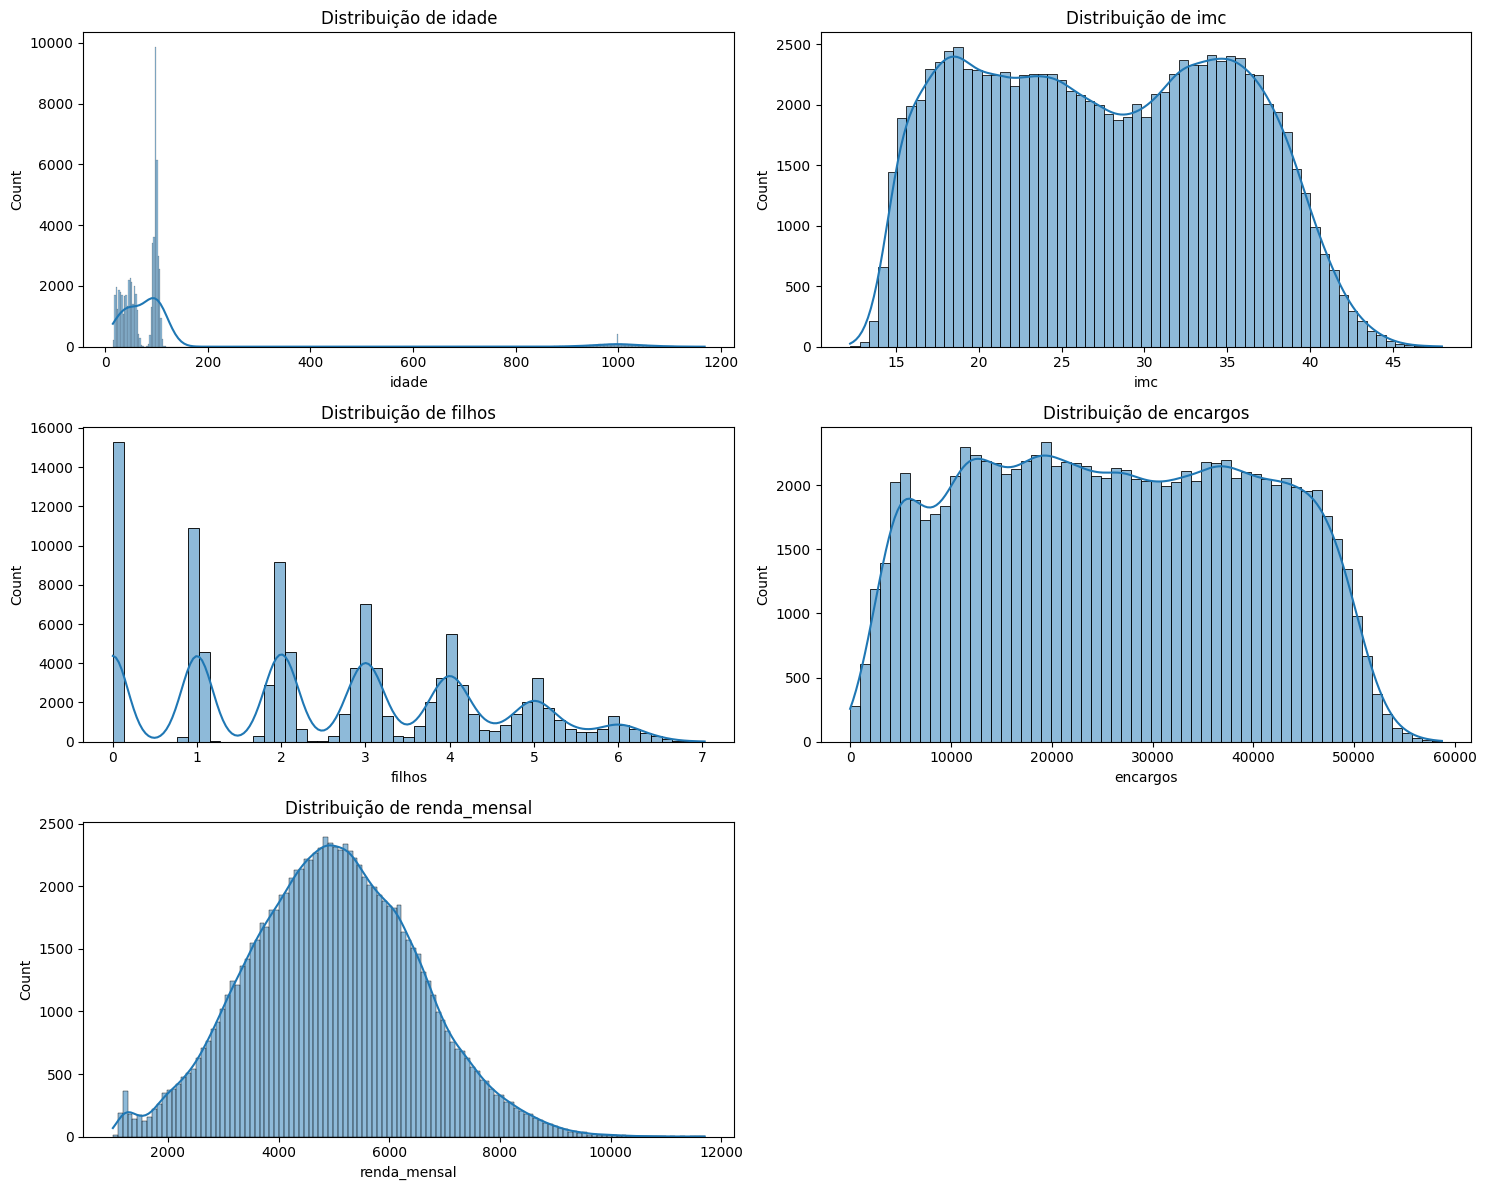

In [60]:
# Plotar histogramas para colunas numéricas
numerical_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols[:6]):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

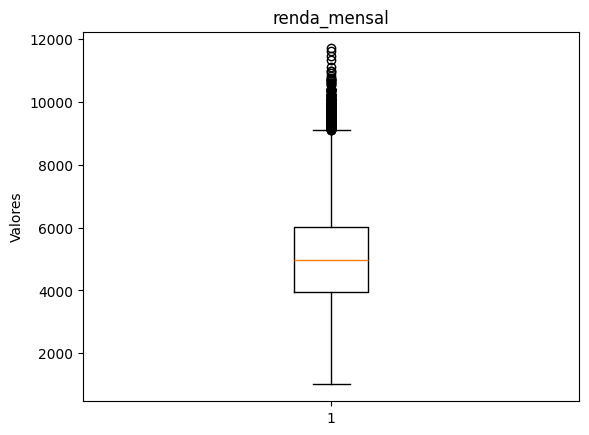

In [61]:
# Criar o gráfico de boxplot
plt.boxplot(df['renda_mensal'])
plt.title('renda_mensal')
plt.ylabel('Valores')
plt.show()

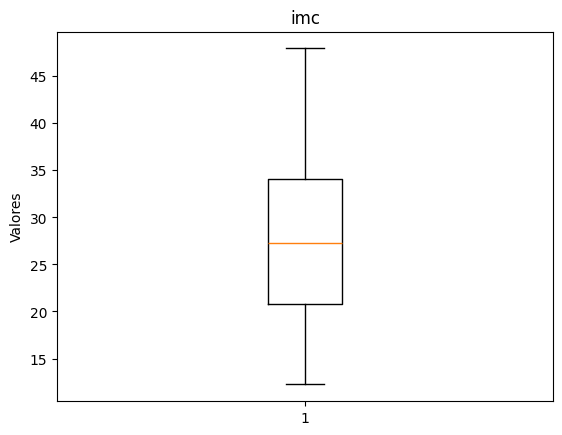

In [62]:
plt.boxplot(df['imc'])
plt.title('imc')
plt.ylabel('Valores')
plt.show()

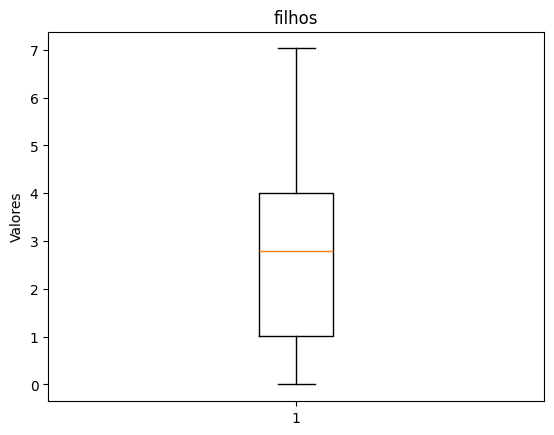

In [63]:
plt.boxplot(df['filhos'])
plt.title('filhos')
plt.ylabel('Valores')
plt.show()

# **Pré-processamento de dados** 🛠️
*   Realize a limpeza dos dados, tratando valores ausentes;
*   Converta variáveis categóricas em formatos adequados para modelagem.

* Idade:

In [ ]:
# Solução 1 - Substituir por mediana.

# Calcular a mediana das idades válidas (excluindo nulos e o valor 99, que é considerado placeholder)
#mediana_idade_valida = df.loc[(df['idade'] != 99) & (~df['idade'].isnull()), 'idade'].median()

#print(f"Idade mediana: {mediana_idade_valida}")

# Substituir 99, 999 e NaN por 46.0
#df['idade'] = df['idade'].apply(lambda x: 46.0 if pd.isnull(x) or x == 999 or x == 99 else x)

In [65]:
df['idade_ausente'] = df['idade'].isnull() | (df['idade'] < 1) | (df['idade'] > 105)

In [66]:
df['idade_ausente'] = df['idade_ausente'].astype(int)

In [67]:
# Preencher idade inválida ou ausente com a mediana das idades válidas
mediana_idade_valida = df.loc[(df['idade'] >= 1) & (df['idade'] <= 105), 'idade'].median()

In [68]:
df['idade'] = df['idade'].apply(
    lambda x: mediana_idade_valida if pd.isnull(x) or x < 1 or x > 105 else x
)

# Mostrar as novas estatísticas
idade_minima_corrigida = df['idade'].min()
idade_maxima_corrigida = df['idade'].max()
mediana_idade_valida, idade_minima_corrigida, idade_maxima_corrigida

(np.float64(65.0), np.float64(15.0), np.float64(105.0))

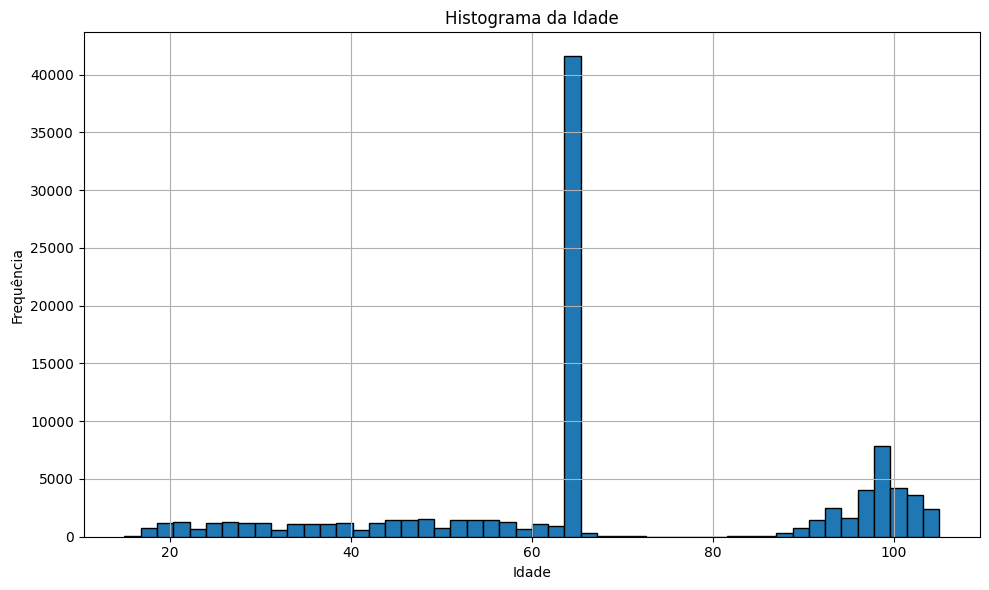

In [69]:
# Gerar histograma da coluna 'idade'
plt.figure(figsize=(10, 6))
plt.hist(df['idade'].dropna(), bins=50, edgecolor='black')
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
# No gráfico podemos ver que muitos registros possuem a idade 99
contagem_idade_999 = (df['idade'] > 105).sum()
contagem_idade_nulas = (df['idade'].isnull()).sum()
print(f"Quantidade de registros com idade 999: {contagem_idade_999}")
print(f"Quantidade de registros nulos: {contagem_idade_nulas}")


Quantidade de registros com idade 999: 0
Quantidade de registros nulos: 0


In [71]:
print(df['idade'].unique())

[ 99.  31.  53.  65.  57.  52.  55.  47.  18.  61.  59.  19.  54.  34.
  39.  22.  35.  62.  20.  23.  26.  60.  56.  46.  42.  33.  41.  21.
  43.  45.  40.  30.  64.  50.  24.  27.  58.  51.  32.  49.  44.  25.
  37.  28.  38.  29.  48.  36.  66.  63.  67.  96.  98.  95.  97.  92.
 101. 100.  90. 104.  68. 103. 102.  87.  94.  93.  70. 105.  84.  16.
  89.  17.  91.  71.  88.  86.  85.  83.  73.  69.  80.  76.  82.  74.
  72.  79.  15.  75.  81.]


In [72]:
media_idade = df['idade'].mean()
print(f"Média de idade: {media_idade:.2f} anos")

Média de idade: 67.52 anos


* Sexo

In [ ]:
# Solução 1 - Substituir sexo a moda.

# Substituir valores nulos em 'sexo' pela moda (valor mais frequente)
#moda_genero = df['sexo'].mode()[0]
#print(moda_genero)

# Substituir nulos e 'desconhecido' por essa moda
#df['sexo'] = df['sexo'].replace(to_replace=[None, 'desconhecido'], value=moda_genero)
#df['sexo'] = df['sexo'].fillna(moda_genero)

# Verificar se ainda existem valores faltantes ou desconhecidos
#print(df['sexo'].value_counts(dropna=False))

In [73]:
# Distribuição da coluna 'sexo'
print(df['sexo'].value_counts(dropna=False))

sexo
masculino       26546
desconhecido    25230
NaN             24602
feminino        23622
Name: count, dtype: int64


In [74]:
df['sexo'] = df['sexo'].replace([None, 'desconhecido'], 'não informado')
df['sexo'] = df['sexo'].fillna('não informado')

* Renda

In [ ]:
print(f"Renda máxima: {df['renda_mensal'].max()}")
print(f"Renda mínima: {df['renda_mensal'].min()}")
print(f"Renda média: {df['renda_mensal'].mean()}")

Renda máxima: 9115.9575
Renda minima: 1004.91
Renda média: 4988.883030275


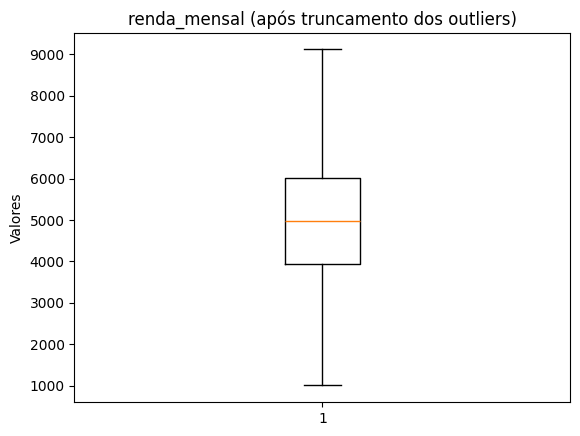

In [83]:
# Calcular Q1, Q3 e IQR
Q1 = df['renda_mensal'].quantile(0.25)
Q3 = df['renda_mensal'].quantile(0.75)
IQR = Q3 - Q1

# Limites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Aplicar truncamento dos valores fora do intervalo
df['renda_mensal'] = df['renda_mensal'].clip(lower=limite_inferior, upper=limite_superior)



plt.boxplot(df['renda_mensal'])
plt.title('renda_mensal (após truncamento dos outliers)')
plt.ylabel('Valores')
plt.show()

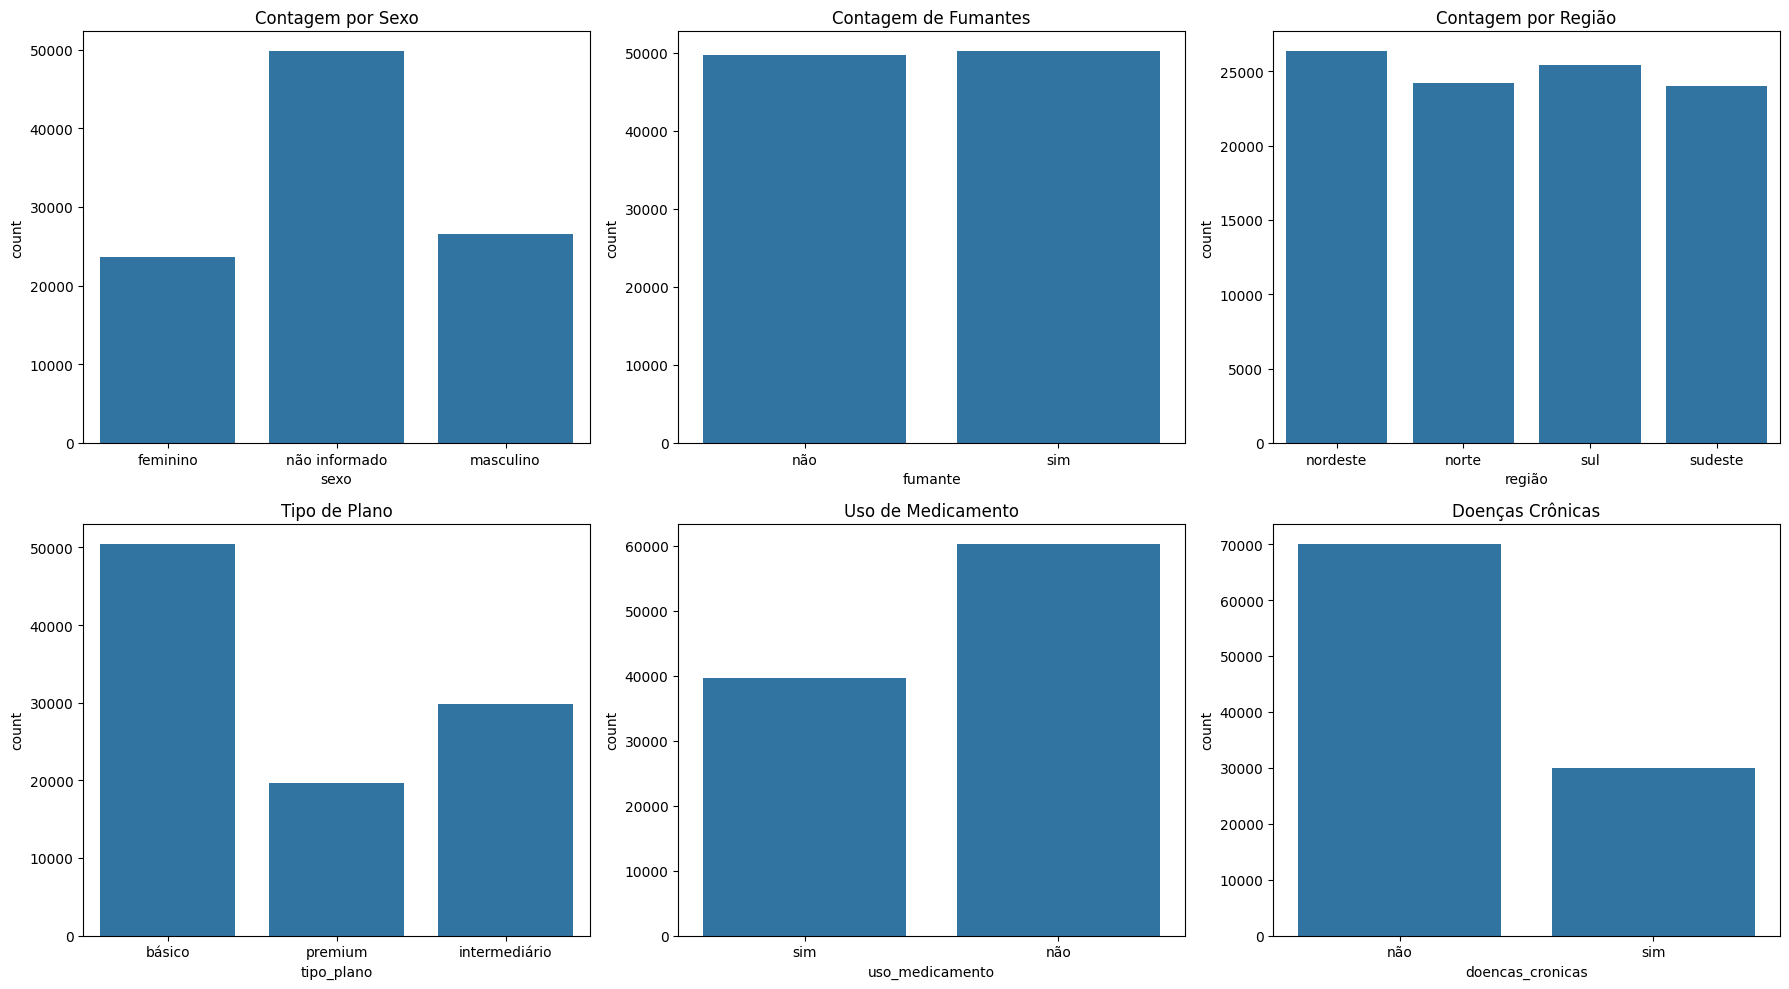

In [84]:
# ========================
# GRÁFICOS DE BARRAS PARA VARIÁVEIS CATEGÓRICAS
# ========================
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.countplot(x='sexo', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Contagem por Sexo')

sns.countplot(x='fumante', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Contagem de Fumantes')

sns.countplot(x='região', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Contagem por Região')

sns.countplot(x='tipo_plano', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Tipo de Plano')

sns.countplot(x='uso_medicamento', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Uso de Medicamento')

sns.countplot(x='doencas_cronicas', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Doenças Crônicas')

plt.tight_layout()
plt.show()

In [85]:
#print(df['encargos'].describe())
df['encargos'] = df['encargos'] / 1000
#print(df['encargos'].describe())

In [86]:
print(df.dtypes)

idade               float64
sexo                 object
imc                 float64
filhos              float64
fumante              object
região               object
encargos            float64
tipo_plano           object
uso_medicamento      object
doencas_cronicas     object
renda_mensal        float64
idade_ausente         int64
dtype: object


* Categorizar

In [87]:
# Solução 1 - Categorizar utilizando get_dummies.

# Converta variáveis categóricas em formatos adequados para modelagem.


# df_encoded = pd.get_dummies(df, columns=['sexo', 'fumante', 'região',
#                                          'tipo_plano', 'uso_medicamento',
#                                          'doencas_cronicas'], drop_first=True)


# # Normalização de Colunas Numéricas
# scaler = StandardScaler()
# colunas_numericas = ['idade', 'imc', 'filhos', 'renda_mensal']
# df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

# # Normalização de Colunas Booleanas
# df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes('bool').columns})

# print(df_encoded.dtypes)



In [88]:
label_encoder = LabelEncoder()

# Ajustar e transformar os rótulos
df['sexo'] = label_encoder.fit_transform(df['sexo'])
df['fumante'] = label_encoder.fit_transform(df['fumante'])
df['região'] = label_encoder.fit_transform(df['região'])
df['tipo_plano'] = label_encoder.fit_transform(df['tipo_plano'])
df['uso_medicamento'] = label_encoder.fit_transform(df['uso_medicamento'])
df['doencas_cronicas'] = label_encoder.fit_transform(df['doencas_cronicas'])

# **Feature Engineering** ✨

In [89]:
df['tipo_plano_renda'] = df['tipo_plano'] * df['renda_mensal']
df['filhos_renda'] = df['filhos'] / (df['renda_mensal'] + 1)

df['idade_imc'] = df['idade'] * df['imc']
df['idade_filhos'] = df['idade'] * df['filhos']
df['idade_medicamento'] = df['idade'] * df['uso_medicamento']

df['genero_doenca_cronica'] = df['sexo'] * df['doencas_cronicas']

df['doencas_cronicas_medicamento'] = df['doencas_cronicas'] * df['uso_medicamento']

In [94]:
# Solução 1 - Utilizando OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_transform = ohe.fit_transform(df[['tipo_plano']])

ohe.get_feature_names_out()

array(['tipo_plano_0', 'tipo_plano_1', 'tipo_plano_2'], dtype=object)

In [95]:
ohe_transform.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], shape=(100000, 3))

In [96]:
df_ohe = pd.DataFrame(ohe_transform.toarray())
df_ohe.columns = ohe.get_feature_names_out()
df_ohe.head()

,tipo_plano_0,tipo_plano_1,tipo_plano_2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [93]:
# Concatenar os dataframes
df = pd.concat([df, df_ohe], axis=1)
df.head()

,idade,sexo,imc,filhos,fumante,região,encargos,tipo_plano,uso_medicamento,doencas_cronicas,...,tipo_plano_renda,filhos_renda,idade_imc,idade_filhos,idade_medicamento,genero_doenca_cronica,doencas_cronicas_medicamento,tipo_plano_0,tipo_plano_1,tipo_plano_2
0,99.0,0,32.76,4.0,0,0,26.86336,0,1,0,...,0.00,0.000986,3243.24,396.0,99.0,0,0,1.0,0.0,0.0
1,31.0,2,31.91,1.0,0,0,48.51073,2,1,1,...,16420.92,0.000122,989.21,31.0,31.0,2,1,0.0,0.0,1.0
2,53.0,1,24.86,0.0,1,1,22.70125,1,1,0,...,7498.52,0.000000,1317.58,0.0,53.0,0,0,0.0,1.0,0.0
3,65.0,2,18.21,4.0,1,1,24.11617,1,0,0,...,6096.40,0.000656,1183.65,260.0,0.0,0,0,0.0,1.0,0.0
4,65.0,2,18.91,1.0,0,0,36.75194,0,0,0,...,0.00,0.000223,1229.15,65.0,0.0,0,0,1.0,0.0,0.0


In [ ]:
# Solução 2 -  Utilizando OrdinalEncoder o modelo não respondeu tão bem quanto com OneHotEncoder

#from sklearn.preprocessing import OrdinalEncoder

#oe = OrdinalEncoder()
#oe_transform_plano = oe.fit_transform(df[['tipo_plano']])

#df['num_tipo_plano'] = oe_transform_plano

In [97]:
def categorizar_idade(idade):
    if idade < 30:
        return 'jovem'
    elif idade < 45:
        return 'adulto'
    elif idade < 60:
        return 'meia_idade'
    elif idade < 75:
        return 'idoso'
    else:
        return 'muito_idoso'

df['faixa_etaria'] = df['idade'].apply(categorizar_idade)


In [98]:
ohe_transform_faixa_etaria = ohe.fit_transform(df[['faixa_etaria']])

ohe.get_feature_names_out()

array(['faixa_etaria_adulto', 'faixa_etaria_idoso', 'faixa_etaria_jovem',
       'faixa_etaria_meia_idade', 'faixa_etaria_muito_idoso'],
      dtype=object)

In [99]:
ohe_transform_faixa_etaria.toarray()

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], shape=(100000, 5))

In [100]:
df_ohe = pd.DataFrame(ohe_transform_faixa_etaria.toarray())
df_ohe.columns = ohe.get_feature_names_out()
df_ohe.head()

,faixa_etaria_adulto,faixa_etaria_idoso,faixa_etaria_jovem,faixa_etaria_meia_idade,faixa_etaria_muito_idoso
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [101]:
# Concatenar os dataframes
df = pd.concat([df, df_ohe], axis=1)
df.head()

,idade,sexo,imc,filhos,fumante,região,encargos,tipo_plano,uso_medicamento,doencas_cronicas,...,doencas_cronicas_medicamento,tipo_plano_0,tipo_plano_1,tipo_plano_2,faixa_etaria,faixa_etaria_adulto,faixa_etaria_idoso,faixa_etaria_jovem,faixa_etaria_meia_idade,faixa_etaria_muito_idoso
0,99.0,0,32.76,4.0,0,0,26.86336,0,1,0,...,0,1.0,0.0,0.0,muito_idoso,0.0,0.0,0.0,0.0,1.0
1,31.0,2,31.91,1.0,0,0,48.51073,2,1,1,...,1,0.0,0.0,1.0,adulto,1.0,0.0,0.0,0.0,0.0
2,53.0,1,24.86,0.0,1,1,22.70125,1,1,0,...,0,0.0,1.0,0.0,meia_idade,0.0,0.0,0.0,1.0,0.0
3,65.0,2,18.21,4.0,1,1,24.11617,1,0,0,...,0,0.0,1.0,0.0,idoso,0.0,1.0,0.0,0.0,0.0
4,65.0,2,18.91,1.0,0,0,36.75194,0,0,0,...,0,1.0,0.0,0.0,idoso,0.0,1.0,0.0,0.0,0.0


In [102]:
df = df.drop(columns=['faixa_etaria', 'idade', 'tipo_plano', 'imc'])
df.head()

,sexo,filhos,fumante,região,encargos,uso_medicamento,doencas_cronicas,renda_mensal,idade_ausente,tipo_plano_renda,...,genero_doenca_cronica,doencas_cronicas_medicamento,tipo_plano_0,tipo_plano_1,tipo_plano_2,faixa_etaria_adulto,faixa_etaria_idoso,faixa_etaria_jovem,faixa_etaria_meia_idade,faixa_etaria_muito_idoso
0,0,4.0,0,0,26.86336,1,0,4053.96,0,0.00,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1.0,0,0,48.51073,1,1,8210.46,0,16420.92,...,2,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1,0.0,1,1,22.70125,1,0,7498.52,0,7498.52,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,4.0,1,1,24.11617,0,0,6096.40,1,6096.40,...,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,1.0,0,0,36.75194,0,0,4485.39,1,0.00,...,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


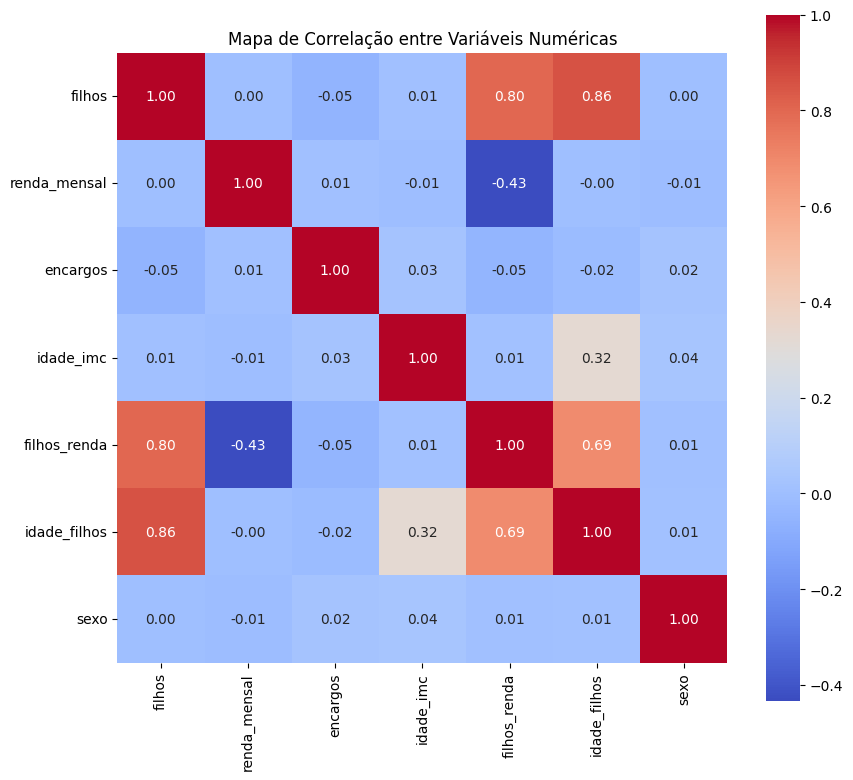

In [103]:
# Selecionar variáveis numéricas para o heatmap
corr_df = df[['filhos',
              'renda_mensal', 'encargos',
              'idade_imc', 'filhos_renda', 
              'idade_filhos', 'sexo']]

# Calcular matriz de correlação
correlation_matrix = corr_df.corr()

# Plotar heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

# **Treinamento Random Forest** 🌲🌳🌿

In [104]:
# 1. Separar features e variável alvo

X = df.drop('encargos', axis=1)
y = df['encargos']

In [105]:
# 2. Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# 3. Treinar modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1, min_samples_leaf=1)
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=0)

In [107]:
# 4. Fazer predições
y_pred = modelo_rf.predict(X_test)

In [108]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

6.2155847631027195


In [109]:
# 5. Avaliar desempenho

#Baseline

baseline_pred = np.full_like(y_test, y_test.mean())

rmse_baseline = mean_squared_error(y_test, baseline_pred)
mae_baseline = mean_absolute_error(y_test, baseline_pred)

#Modelo

rmse_modelo = mean_squared_error(y_test, y_pred)
mae_modelo = mean_absolute_error(y_test, y_pred)

# 6. Porcentagem de melhora
melhora_rmse = (rmse_baseline - rmse_modelo) / rmse_baseline * 100
melhora_mae = (mae_baseline - mae_modelo) / mae_baseline * 100

r2 = r2_score(y_test, y_pred)

#print(f"RMSE (Erro Quadrático Médio): {rmse_modelo:.2f}")
#print(f"R² (Coeficiente de Determinação): {r2:.2f}")

print(f"📈 RMSE: {rmse_modelo:.2f}")
print(f"📉 MAE: {mae_modelo:.2f}")
print(f"🎯 R²: {r2:.2f}%\n")

print(f"📊 RMSE Baseline: {rmse_baseline:.2f}")
print(f"📈 RMSE Modelo  : {rmse_modelo:.2f}")
print(f"✅ Redução RMSE : {melhora_rmse:.2f}%\n")

print(f"📊 MAE Baseline : {mae_baseline:.2f}")
print(f"📉 MAE Modelo   : {mae_modelo:.2f}")
print(f"✅ Redução MAE  : {melhora_mae:.2f}%")

📈 RMSE: 38.63
📉 MAE: 4.13
🎯 R²: 0.80%

📊 RMSE Baseline: 189.62
📈 RMSE Modelo  : 38.63
✅ Redução RMSE : 79.63%

📊 MAE Baseline : 11.85
📉 MAE Modelo   : 4.13
✅ Redução MAE  : 65.13%


📊 Interpretação dos Resultados:

| Métrica  | Valor | Interpretação                                                                                   |
| -------- | ----- | ----------------------------------------------------------------------------------------------- |
| 📊**Baseline (média)** | 189.62 | Modelo que sempre prevê a média dos encargos.                              |
| 📈 **RMSE** | 39.25 | Em média, o modelo erra os encargos em ±62.83 unidades monetárias.Erro médio quadrático — sensível a outliers. Um valor muito bom considerando a base original com RMSE baseline de 189.62. |
| 📉 **MAE** | 4.19 | Erro médio absoluto — mostra que, em média, o modelo erra apenas 4.19 unidades, o que é excelente. |
| 🎯 **R²**   | 0.79  | O modelo explica **79% da variação** dos encargos com as variáveis usadas. |


* Validação estatística: 

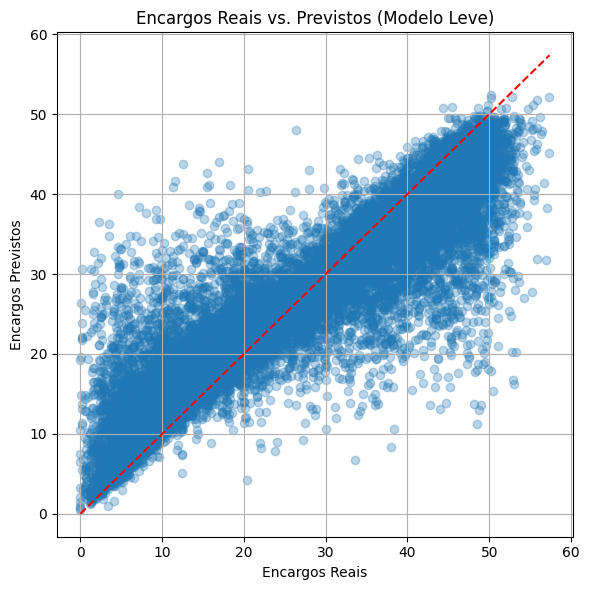

In [110]:
# Real vs Previsto

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Encargos Reais vs. Previstos (Modelo Leve)')
plt.xlabel('Encargos Reais')
plt.ylabel('Encargos Previstos')
plt.grid(True)
plt.tight_layout()
plt.show()

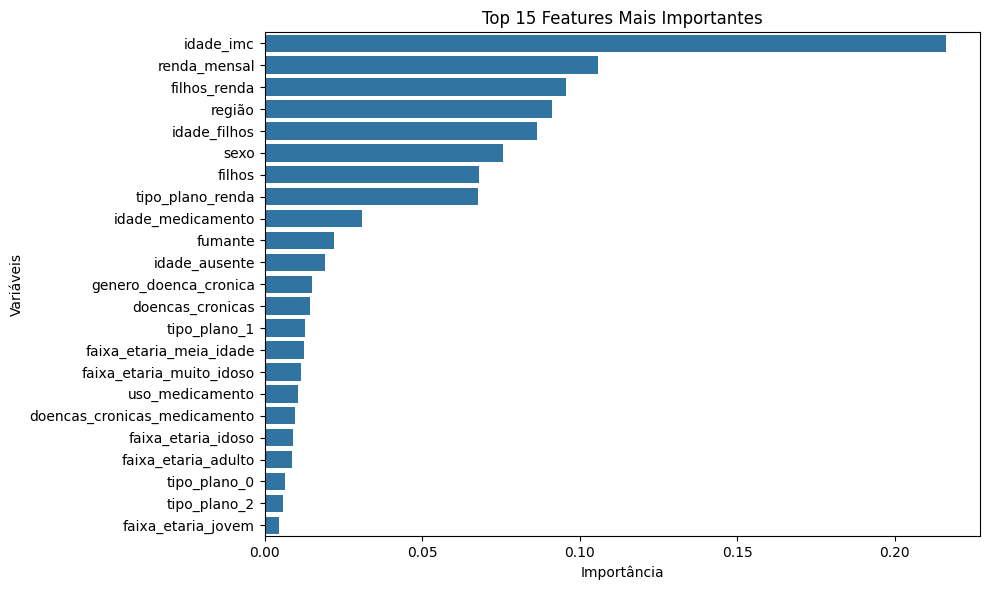

In [111]:
# Importâncias das features
importancias = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importancias_top = importancias.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias_top.values, y=importancias_top.index)
plt.title('Top 15 Features Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

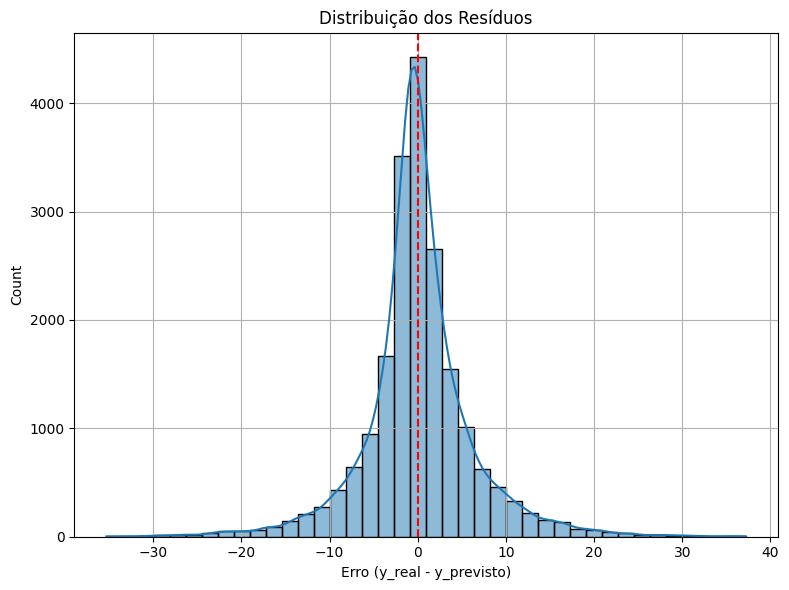

In [112]:
# Gráfico: Resíduos (Erros)

residuos = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuos, bins=40, kde=True)
plt.axvline(0, color='r', linestyle='--')
plt.xlabel('Erro (y_real - y_previsto)')
plt.title('Distribuição dos Resíduos')
plt.grid(True)
plt.tight_layout()
plt.show()

✅ 1. Forma Simétrica e Centragem em 0
* A distribuição está bem centrada no zero, com uma leve cauda à direita.

* Isso indica que o modelo não está sistematicamente errando para mais ou para menos, o que é ótimo.

✅ 2. Pico alto no centro
* A maioria dos resíduos está bem próxima de 0, sugerindo que as previsões estão muito próximas dos valores reais para grande parte dos dados.

⚠️ 3. Caudas levemente assimétricas
* Pequena assimetria para a direita (resíduos positivos mais longos) indica que o modelo subestima ligeiramente os encargos mais altos.

* Isso pode acontecer em problemas de regressão com outliers positivos ou valores raros muito altos.

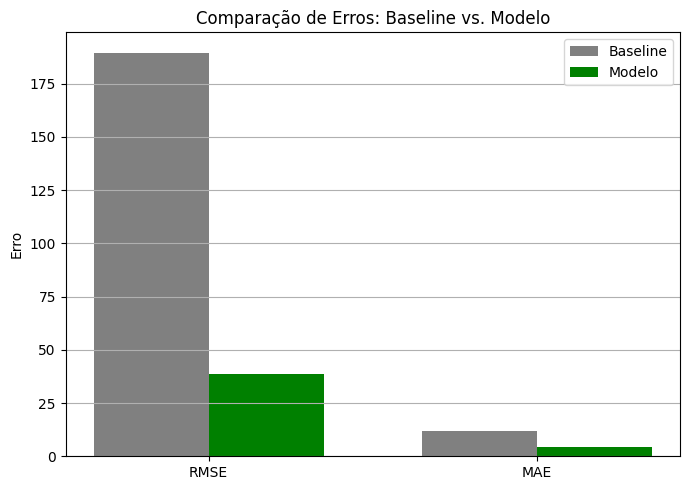

In [113]:
# Gráfico comparativo
labels = ['RMSE', 'MAE']
baseline_vals = [rmse_baseline, mae_baseline]
modelo_vals = [rmse_modelo, mae_modelo]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7,5))
ax.bar(x - width/2, baseline_vals, width, label='Baseline', color='gray')
ax.bar(x + width/2, modelo_vals, width, label='Modelo', color='green')

ax.set_ylabel('Erro')
ax.set_title('Comparação de Erros: Baseline vs. Modelo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()
